<a href="https://colab.research.google.com/github/jugernaut/MACTI-programacionparalelo/blob/erick/05_RedesNeuronales/MinimosCuadrados_interactive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

fatal: destination path 'Numerico2021' already exists and is not an empty directory.


interactive(children=(IntSlider(value=0, description='alfa', max=3, min=-1), IntSlider(value=0, description='b…

<function __main__.tanteo(alfa, beta)>

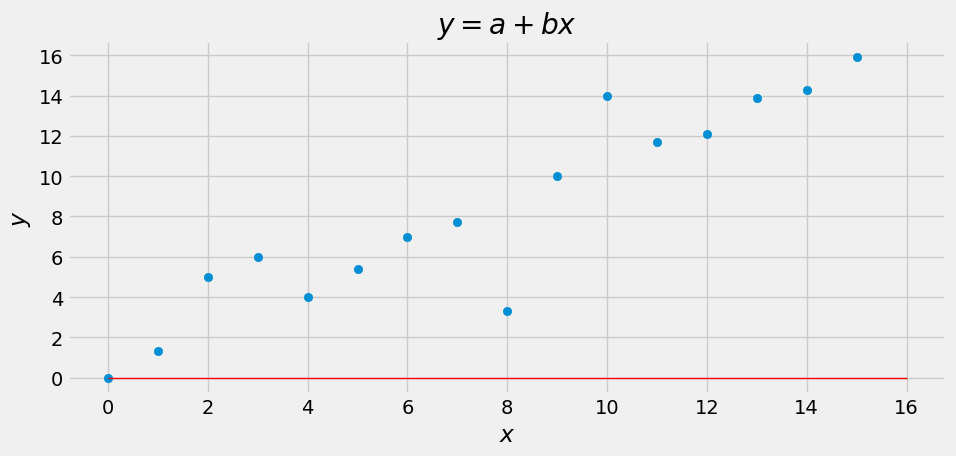

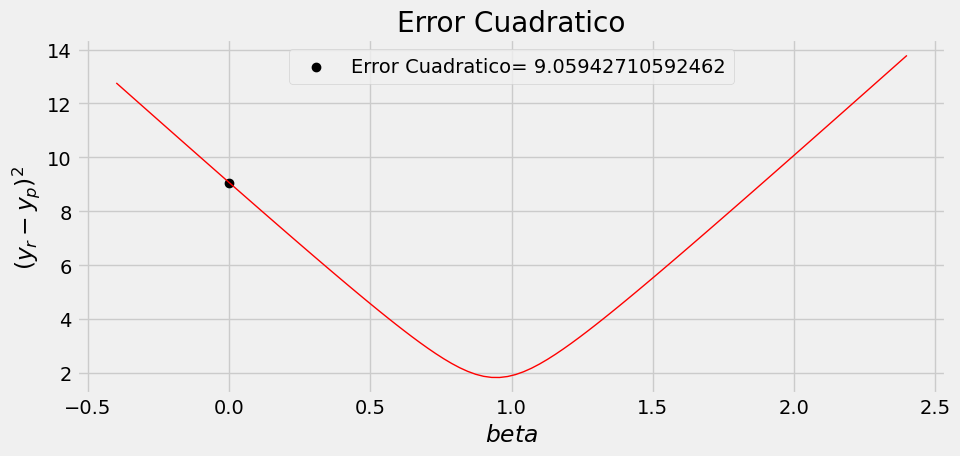

In [ ]:
# se clona todo el repositorio
!git clone https://github.com/jugernaut/Numerico2021.git

import numpy as np
import matplotlib.pyplot as plt
import Numerico2021.Utils.gutils as vis
import random
from ipywidgets import interact
import ipywidgets as widgets

# datos aleatorios
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
y = [0,1.3,5,6,4,5.4,7,7.7,3.3,10,14,11.7,12.1,13.9,14.3,15.9]

# ecuacion parametrica de la recta
def aprox(alfa, beta, n):
    x = np.linspace(0, n, n)
    y = alfa+beta*x
    return x,y

def tanteo(alfa, beta):
    # recta que intenta ajustar los datos
    xaprox,yaprox = aprox(alfa,beta,16)
    errorC = vis.RMS(y,yaprox)

    par = [{'title':'$y= a + b x$',
            'xlabel':'$x$',
            'ylabel':'$y$'}]
    graf = vis.planoCartesiano(par=par)
    graf.scatter(x=x,y=y)
    graf.plot(x=xaprox, y=yaprox, par={'ls':'-', 'lw':1, 'color':'red'})
    # se muestra el error cuadratico
    #print('Error cuadratico medio ='+str(errorC))

    # grfica de los errores
    par1 = [{'title':'Error Cuadratico',
            'xlabel':'$beta$',
            'ylabel':'$(y_{r}-y_{p})^{2}$'}]
    # grfica de los errores
    error = vis.planoCartesiano(par=par1)

    min = aprox(0.56527778, beta, 16)[1]

    #punto en grafica de error
    punto = vis.RMS(min, y)

    betas = np.linspace(-0.4,2.4,100)

    aproximaciones = [aprox(0.56527778, i, 16)[1] for i in betas]

    sumas = [vis.RMS(y, i) for i in aproximaciones]

    error.plot(x=betas, y=sumas, par={'ls':'-', 'lw':1, 'color':'red'})

    error.scatter(x=beta, y=punto, par={'lw':1, 'color':'black', 'label':'Error Cuadratico= '+str(punto)})

    error.legend()


interact(tanteo, alfa=widgets.IntSlider(min=-1,max=3,step=1,value=0),
         beta=widgets.IntSlider(min=-1,max=3,step=1,value=0))

